# climate analysis in Galicia, Spain  
### NOTE: I did not add screenshots or code about data preparation or processing to avoid making this notebook too long. If you want to see this part better, go to the GitHub repository.

Introducción

Obtención de datos

Limpieza y transformación

Análisis exploratorio

Modelado (si aplica)

Conclusiones

Ideas futuras

## Motivation
I lived in Galicia for a little over two years, and I was always told that it rained a lot in this area, and even more in the past, that "the cold in Galicia is different, it gets into your bones."  
This always sparked my curiosity, asking myself: How many days does it rain a year? How cold is it? Is this "chill in your bones" due to humidity? Which city is the coldest of all? And many other questions I didn't know how to answer.  
So I decided to do this project. Its purpose is to answer several of these questions that sparked my curiosity.  

## ASK 
This project contains data from the largest cities in Galicia (Coruña, Lugo, Ourense, Vigo, Pontevedra, and Santiago de Compostela), where I will conduct data analysis from January 1, 2023, to March 1, 2025. To answer some of the aforementioned questions, I will conduct other types of studies, comparisons, and predictions.

### Questions  
- Which city has the most stable climate (least variability in temperature)?
- How are cities organized by precipitation?
- How are cities organized by temperature?
- How are cities organized by humidity?
- Which is the most extreme city (maximum and minimum temperatures furthest from the Galician average)?
- What climate trends are observed between 2023 and 2024?
- What relationships exist between temperature, humidity, and precipitation?
- What is the percentage of rainfall in Galicia? (days per year)

## Prepare  
### Data
All data was obtained from MeteoGalicia and its MeteoSIX API.
They cover the period from January 1, 2023, to March 31, 2025. Three variables of interest are included: Precipitation, Temperature, and Humidity.

### Tools
The project is largely written in Python.
The libraries used are: Pandas, OS, Streamlit, Plotly, Seaborn, Folium, among others.


### Data type
The data obtained by MeteoGalicia is provided in CSV format. They have a simple graphical interface for obtaining this data from their website. You can obtain data for up to 10 years, but only for one point at a time. Forecast data, on the other hand, is obtained from the MeteoSIX API in JSON (see the streamlit).  
### They are organized  
We have 6 tables (one for each city) with a total of 4 columns (date, humidity, precipitation, and temperature) and 821 rows (one row is equivalent to one day). This represents a total of almost 5,000 data points.
Meanwhile, for the forecast, there are 6 time tables (one for each city) and 5 columns (here, sky_state is added to the columns). This represents a total of 144 data points, considering all the tables.


## Process
We performed a transformation on the DataFrame since it had two levels using pivot_table. The pivot code was as follows:
df_pivot = df.pivot_table(index="Date", columns="Variable", values="Value", aggfunc="first")

In addition, a ".concat" was performed on each table to generate a main table for Galicia, with a "city" column representing the city on which day these values ​​are collected. In other words, the id is composed of: date + city.

## Analyze  
For a better analysis we will divide each variable of interest, where we will have precipitation, temperature and humidity, in that order, but first we need to charge the libraries and the data  
### Libraries

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
import tempfile

### Data

In [3]:
project = os.path.dirname(os.getcwd())  
folder = os.path.join(project, 'data', 'processed', 'galicia')
file = "galicia.csv"
path_file = os.path.join(folder, file)
df = pd.read_csv(path_file, index_col=0, parse_dates=["fecha"])
df.columns = ['date', 'hum', 'prep', 'temp', 'city']
df['month'] = df['date'].dt.month

In [4]:
df.head()

,date,hum,prep,temp,city,month
0,2023-01-01,98.0,22.6,12.01,Coruña,1
1,2023-01-02,90.0,1.1,10.98,Coruña,1
2,2023-01-03,86.0,0.0,12.01,Coruña,1
3,2023-01-04,91.0,0.0,14.55,Coruña,1
4,2023-01-05,95.0,0.0,12.99,Coruña,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4926 entries, 0 to 820
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4926 non-null   datetime64[ns]
 1   hum     4926 non-null   float64       
 2   prep    4926 non-null   float64       
 3   temp    4926 non-null   float64       
 4   city    4926 non-null   object        
 5   month   4926 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 250.1+ KB


### Precipitation  
#### Precipitation about cities:
In this first part we can respond question about cities, like: How are cities organized by precipitation?

In [6]:
df_kpi = df.groupby("city")
rain_days = df[df["prep"] > 0].groupby("city").size()
prom_rain = df.groupby("city")["prep"].mean()

In [7]:
rain_list = rain_days.sort_values(ascending=False).reset_index().rename(columns={0:"prep days count"})
print(rain_list)
fig = px.bar(rain_list, x="city", y="prep days count", 
                        title=f"         Precipitation days count per city ")
fig.update_layout(
        plot_bgcolor='rgba(0, 0, 0, 0)',
        paper_bgcolor='rgba(0, 0, 0, 0)',
        font=dict(color='white'),
        title_font=dict(color='white'),
        legend=dict(font=dict(color='white')),
        xaxis=dict(title='cities', color='white'),
        yaxis=dict(title='rainy days', color='white', gridcolor='rgba(255, 255, 255, 0.4)'),
        autosize=True,
        margin=dict(l=20, r=20, t=40, b=40)
    )
fig.show()

                     city  prep days count
0  Santiago de Compostela              382
1                  Coruña              363
2                    Lugo              351
3              Pontevedra              346
4                    Vigo              324
5                 Ourense              293


In [8]:
prom_rain.sort_values(ascending=False)

prom_rain_list = prom_rain.sort_values(ascending=False).reset_index().rename(columns={0:"prep"})
print(prom_rain_list)
fig = px.bar(prom_rain_list, x="city", y="prep", 
                        title=f"         Average precipitation per city ")
fig.update_layout(
        plot_bgcolor='rgba(0, 0, 0, 0)',
        paper_bgcolor='rgba(0, 0, 0, 0)',
        font=dict(color='white'),
        title_font=dict(color='white'),
        legend=dict(font=dict(color='white')),
        xaxis=dict(title='cities', color='white'),
        yaxis=dict(title='precipitation (L/m2)', color='white', gridcolor='rgba(255, 255, 255, 0.4)'),
        autosize=True,
        margin=dict(l=20, r=20, t=40, b=40)
    )
fig.show()

                     city      prep
0  Santiago de Compostela  5.783313
1              Pontevedra  5.211206
2                    Vigo  4.042996
3                    Lugo  3.358465
4                  Coruña  3.340073
5                 Ourense  2.622412


The distribution for **days with rain**:  
**Santiago de Compostela > Coruña > Lugo > Pontevedra > Vigo > Ourense**  
  
The distribution for **average precipitation** per city:  
**Santiago de Compostela > Pontevedra > Vigo > Lugo > Coruña > Ourense**  
  
**Santiago de Compostela** is the city with most days and most average precipitation  
**Ourense** is the city with the lowest quantity of rainy days and lowest average precipitation  


#### Precipitation about dates:
In this second part we can respond question about dates, like: What is the month in which it rains the most?

In [9]:
month_rain_list = df[["month", "prep"]].groupby("month").mean().reset_index()
meses = {
    1: 'january', 2: 'february', 3: 'march', 4: 'april',
    5: 'may', 6: 'june', 7: 'july', 8: 'august',
    9: 'september', 10: 'october', 11: 'november', 12: 'december'
}
month_rain_list['month_name'] = month_rain_list['month'].map(meses)
month_rain_list

,month,prep,month_name
0,1,6.957885,january
1,2,3.722745,february
2,3,4.323118,march
3,4,2.672500,april
4,5,3.260753,may
5,6,2.560833,june
6,7,0.868548,july
7,8,0.668817,august
8,9,3.357778,september
9,10,9.458333,october


In [10]:
print("Natural Order")
print(month_rain_list)
print("------------------------------------------------")
print("Descending order of prep")
month_rain_list_order = month_rain_list.sort_values(by="prep", ascending=False)
print(month_rain_list_order)

fig = px.bar(month_rain_list, x="month_name", y="prep", 
                        title=f"         Average precipitation per month ")
fig.update_layout(
        plot_bgcolor='rgba(0, 0, 0, 0)',
        paper_bgcolor='rgba(0, 0, 0, 0)',
        font=dict(color='white'),
        title_font=dict(color='white'),
        legend=dict(font=dict(color='white')),
        xaxis=dict(title='month', color='white'),
        yaxis=dict(title='precipitation (L/m2)', color='white', gridcolor='rgba(255, 255, 255, 0.4)'),
        autosize=True,
        margin=dict(l=20, r=20, t=40, b=40)
    )
fig.show()

Natural Order
    month      prep month_name
0       1  6.957885    january
1       2  3.722745   february
2       3  4.323118      march
3       4  2.672500      april
4       5  3.260753        may
5       6  2.560833       june
6       7  0.868548       july
7       8  0.668817     august
8       9  3.357778  september
9      10  9.458333    october
10     11  5.551389   november
11     12  3.790860   december
------------------------------------------------
Descending order of prep
    month      prep month_name
9      10  9.458333    october
0       1  6.957885    january
10     11  5.551389   november
2       3  4.323118      march
11     12  3.790860   december
1       2  3.722745   february
8       9  3.357778  september
4       5  3.260753        may
3       4  2.672500      april
5       6  2.560833       june
6       7  0.868548       july
7       8  0.668817     august


The order of the months is a bit more complicated, as depending on the season, they can have more or less rainfall, and even the transitions between seasons can vary this precipitation. This graph above presents the average monthly rainfall, which is in monthly order. Therefore, the maximum is in October (10), followed by January (1), and the final months are:  
**October > January > November > March > December > February > September > May > April > June > July > August**  
  
Month with the highest monthly precipitation: **October**  
Month with the lowest monthly precipitation: **August**  
  

#### Count of days with rain
The following code is used to calculate the number of rainy days per month. We'll take into account everything that happens before 2025, giving us two values ​​for each day. Divide by two to get the average number of rainy days for each month. This is done to determine which month tends to rain the most and which tends to rain the least.

In [11]:
df_prep = df[["date", "prep", "month"]].groupby("date").mean().reset_index()
df_2324 = df_prep[df_prep['date'].dt.year < 2025]
df_count_days = df_2324[df_2324["prep"] > 0].groupby("month").size().apply(lambda x: int(x/2)).reset_index().rename(columns={0:"count of rainy days"})
df_count_days['month_name'] = df_count_days['month'].map(meses)
df_count_days

,month,count of rainy days,month_name
0,1.0,19,january
1,2.0,13,february
2,3.0,22,march
3,4.0,13,april
4,5.0,19,may
5,6.0,16,june
6,7.0,11,july
7,8.0,12,august
8,9.0,17,september
9,10.0,22,october


Descending order of count rainy days
    month  count of rainy days month_name
2     3.0                   22      march
9    10.0                   22    october
10   11.0                   20   november
0     1.0                   19    january
4     5.0                   19        may
11   12.0                   19   december
8     9.0                   17  september
5     6.0                   16       june
3     4.0                   13      april
1     2.0                   13   february
7     8.0                   12     august
6     7.0                   11       july


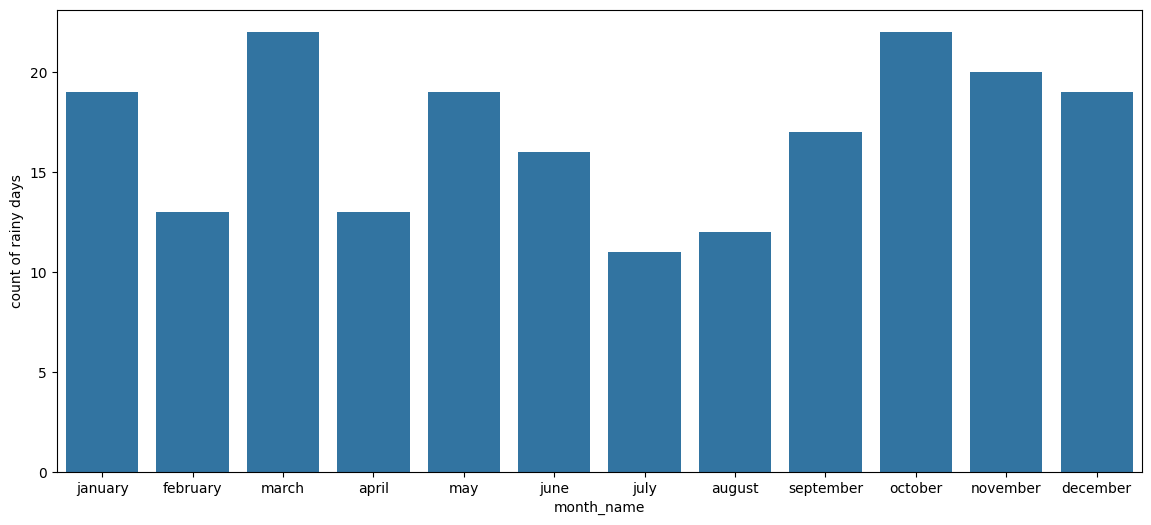

In [12]:
print("Descending order of count rainy days")
df_count_days_order = df_count_days.sort_values(by="count of rainy days", ascending=False)
print(df_count_days_order)
plt.figure(figsize=(14, 6))
sns.barplot(df_count_days, x="month_name", y="count of rainy days")
plt.show()

The order of the number of rainy days per month is:  
**March = October > November > January = May = December > September > June > April = February > August > July**  
In Galicia, there are two months with the most rainy days: March and October. This is interesting because March doesn't even rank third in terms of average rainfall, but October has the highest average rainfall. On the other hand, the lowest rainfall occurs in July.  
This means that each month it rains at least more than 1/3 of the month (11 days), while at most it rains more than 2/3 of the month (22 days)

### Temperature  
#### Temperature about cities:
In this first part we can respond question about cities, like: How are cities organized by temperature?

In [14]:
df.groupby("city")["temp"].mean()

city
Coruña                    15.635030
Lugo                      12.610110
Ourense                   14.689866
Pontevedra                15.698965
Santiago de Compostela    13.793544
Vigo                      16.263520
Name: temp, dtype: float64

In [17]:
prom_temp = df.groupby("city")["temp"].mean()
prom_temp

city
Coruña                    15.635030
Lugo                      12.610110
Ourense                   14.689866
Pontevedra                15.698965
Santiago de Compostela    13.793544
Vigo                      16.263520
Name: temp, dtype: float64

In [20]:
temp_list = prom_temp.sort_values(ascending=False).reset_index().rename(columns={0:"temp"})
print(temp_list)
fig = px.bar(temp_list, x="city", y="temp", 
                        title=f"         Average Temperature about city")
fig.update_layout(
        plot_bgcolor='rgba(0, 0, 0, 0)',
        paper_bgcolor='rgba(0, 0, 0, 0)',
        font=dict(color='white'),
        title_font=dict(color='white'),
        legend=dict(font=dict(color='white')),
        xaxis=dict(title='cities', color='white'),
        yaxis=dict(title='rainy days', color='white', gridcolor='rgba(255, 255, 255, 0.4)'),
        autosize=True,
        margin=dict(l=20, r=20, t=40, b=40)
    )
fig.show()

                     city       temp
0                    Vigo  16.263520
1              Pontevedra  15.698965
2                  Coruña  15.635030
3                 Ourense  14.689866
4  Santiago de Compostela  13.793544
5                    Lugo  12.610110


In [22]:
df.groupby("city")["temp"].max().sort_values(ascending=False).reset_index().rename(columns={0:"temp"})

,city,temp
0,Ourense,31.00
1,Lugo,27.80
2,Pontevedra,26.69
3,Santiago de Compostela,26.61
4,Vigo,26.03
5,Coruña,24.56


In [23]:
df.groupby("city")["temp"].min().sort_values(ascending=False).reset_index().rename(columns={0:"temp"})

,city,temp
0,Vigo,6.67
1,Coruña,6.42
2,Pontevedra,4.80
3,Santiago de Compostela,3.40
4,Ourense,1.04
5,Lugo,0.56


The distribution for **average temperature** per city:  
**Vigo > Pontevedra > Coruña > Ourense > Santiago de Compostela > Lugo**  
  
The distribution for **MAX temperature** per city:  
**Ourense > Lugo > Pontevedra > Santiago de Compostela > Vigo > Coruña**  
  
The distribution for **MIN temperature** per city:  
**Vigo > Coruña > Pontevedra > Santiago de Compostela > Ourense > Lugo**  
    
These statistics are very important because, if you look at the average temperature, the city with the highest value is Vigo (16.2°C). However, it is the second-to-last city when ordered by absolute maximum temperatures, while it has the highest value for absolute minimum temperatures. The important conclusion here is Vigo's low temperature variability, in addition to having a good climate, as it doesn't get too hot and it's not the coldest city either.  
  
So, we'll look for the standard deviation to consider the variability data.

In [24]:
df.groupby("city")["temp"].std().sort_values(ascending=False).reset_index().rename(columns={0:"temp"})

,city,temp
0,Ourense,6.100568
1,Lugo,5.378767
2,Pontevedra,4.707399
3,Santiago de Compostela,4.503681
4,Vigo,3.865587
5,Coruña,3.647277


The distribution for standard deviation per city:  
**Ourense > Lugo > Pontevedra > Santiago de Compostela > Vigo > Coruña**  
  
Once again, Vigo is second to last, which is very important, as the temperature in Vigo is comfortable and hovers around **16°C (+/-6.1°C)**. The other cities have the lowest temperatures and the greatest variation (with the exception of A Coruña).


#### Temperature about dates:
In this second part we can respond question about dates, like: What is the month with highest temperature?